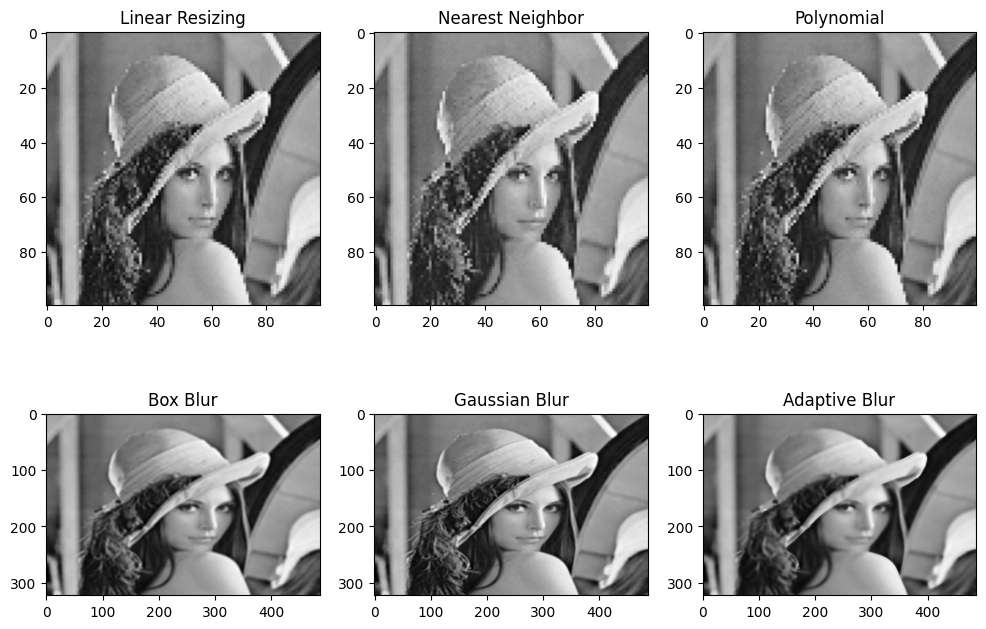

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from tensorflow.keras.datasets import mnist

# Task 1: Image Processing
# Load an example image
image = cv2.imread("./test.png", cv2.IMREAD_GRAYSCALE)

# 1.1 Image Resizing
linear_resized = cv2.resize(image, (100, 100), interpolation=cv2.INTER_LINEAR)
nearest_resized = cv2.resize(image, (100, 100), interpolation=cv2.INTER_NEAREST)
poly_resized = cv2.resize(image, (100, 100), interpolation=cv2.INTER_CUBIC)

# 1.2 Image Blurring
box_blur = cv2.blur(image, (5, 5))
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
adaptive_blur = cv2.bilateralFilter(image, 9, 75, 75)

# Plot results
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs[0, 0].imshow(linear_resized, cmap='gray'); axs[0, 0].set_title("Linear Resizing")
axs[0, 1].imshow(nearest_resized, cmap='gray'); axs[0, 1].set_title("Nearest Neighbor")
axs[0, 2].imshow(poly_resized, cmap='gray'); axs[0, 2].set_title("Polynomial")
axs[1, 0].imshow(box_blur, cmap='gray'); axs[1, 0].set_title("Box Blur")
axs[1, 1].imshow(gaussian_blur, cmap='gray'); axs[1, 1].set_title("Gaussian Blur")
axs[1, 2].imshow(adaptive_blur, cmap='gray'); axs[1, 2].set_title("Adaptive Blur")
plt.show()




In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.datasets import load_digits
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder.appName("ML_Task").getOrCreate()

# Task 2: Machine Learning on Digits Dataset
# Load dataset using sklearn
digits = load_digits()
X, y = digits.data, digits.target

# Split dataset into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Train SVM Classifier
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)

# Evaluate Models
def evaluate_model(model_name, y_true, y_pred):
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='macro'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='macro'):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='macro'):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

# Evaluate both models
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("SVM", y_test, svm_preds)

# Compute ROC and AUC
y_test_bin = label_binarize(y_test, classes=np.arange(10))
rf_probs = rf.predict_proba(X_test)
svm_probs = svm.predict_proba(X_test)

fig, ax = plt.subplots()
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], rf_probs[:, i])
    ax.plot(fpr, tpr, label=f"RF Class {i} (AUC = {auc(fpr, tpr):.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("Random Forest ROC Curves")
plt.show()



PySparkRuntimeError: [JAVA_GATEWAY_EXITED] Java gateway process exited before sending its port number.